## Polynomiale Regression
----------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Wir beginnen mit unserer Übung, indem wir Daten sammeln. Die Daten werden von einer Funktion generiert, die Sie nicht kennen. Diese Vorbedingung macht das Beispiel realistischer, da wir in realen Anwendungen die genauen Spezifikationen des zugrunde liegenden Datenerzeugungsprozesses nicht kennen. Am Ende dieses Abschnitts lüften wir das Geheimnis des Datengenerierungsprozesses.

Dies sind die Daten, unsere Beobachtungen, in tabellarischer Form. Wir haben $25$ Datenpunkte, jeder Datenpunkt ist ein ($x,y$) Paar.

In [2]:
poly_data =pd.DataFrame({'x':[0.001399613,0.971629779,0.579119475,0.335693937,0.736736086,0.492572335,0.737133774,0.563693769,0.877603280,0.141426545,0.307203910,0.024509308,0.843665029,0.771206067,0.149670258,0.359605608,0.049612895,0.409898906,0.935457898,0.149476207,0.234315216,0.455297119,0.102696671,0.715372314,0.681745393],'y':[-0.23436656,0.64689524,-0.92635765,0.13000706,-0.89294863,0.33854780,-1.24171910,-0.22523318,-0.12962722,0.37632006,0.30299077,-0.21162739,-0.76468719,-0.90455412,0.77097952,0.56466366,0.18897607,0.32531750,-0.78703491,0.80585375,0.62944986,0.02353327,0.27621694,-1.20379729,-0.83059624]})

Hier sind die Daten in Form eines Streudiagramms dargestellt:

Text(0, 0.5, 'y')

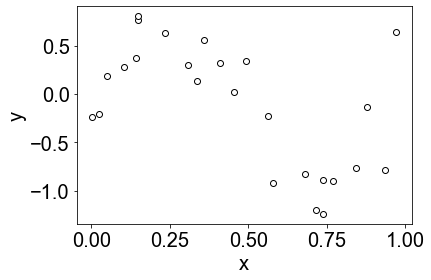

In [3]:
fig = plt.figure()
X = poly_data['x']
y = poly_data['y']
plt.scatter(X,y,edgecolor = 'k',color = 'white')
plt.xlabel('x')
plt.ylabel('y')

### Anpassen einer Kurve in Python: Die Notation in Python

Python bietet leistungsstarke Funktionen zur Anpassung eines Polynoms an Daten. Eine davon ist die Funktion `OLS()`, die wir bereits kennen. Um jedoch ein $k$-dimensionales Polynom anzupassen, verwenden wir `linear_model` aus dem `sklearn` Paket  und fügen dem Funktionsaufruf `LinearRegression()` zusätzliche `PolynomialFeatures` hinzu. Darüber hinaus gibt es zwei verschiedene Möglichkeiten, eine polynomiale Regression zu kodieren.

Für ein Polynom $3$. Ordnung besteht die erste Möglichkeit darin, `model.predict(X-werte)` einzugeben und zu plotten, und die zweite Möglichkeit ist die Koeffizienten mit `model.coef_` aus dem Model auszulesen und daraus Äquivalent zu $\hat y = \beta_0+\beta_1x+\beta_2x^2+...+\beta_kx^k+\epsilon$  `model.coef_[0][0] + model.coef_[0][1] * X-werte + model.coef_[0][2] * (X-werte)**2 + ...` zu konstruieren.

Um die Verwirrung zu lindern, zeigen wir ein Beispiel in Python. Wir konstruieren zwei Polynome der Ordnung 2 für `poly_data`.

In [4]:
X = poly_data['x'].values.reshape(-1,1)
y = poly_data['y'].values.reshape(-1,1)

# Lineares Modell fitten
model = LinearRegression()
model.fit(X, y)

# Polynomial Fit
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_2, y)

LinearRegression()

In [5]:
model.coef_

array([[ 0.        , -1.36814765,  0.18900934]])

Wir überprüfen die Ergebnisse des Modells.

In [6]:
print('Achsenabschnitt :',model.intercept_)
print('Koeffizienten : ', model.coef_)

Achsenabschnitt : [0.4591628]
Koeffizienten :  [[ 0.         -1.36814765  0.18900934]]


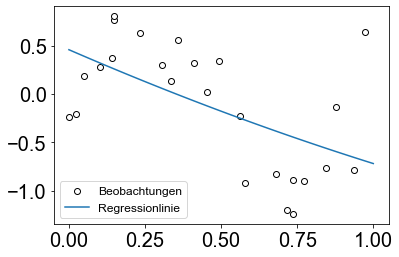

In [7]:
# Speichere Koeffizienten des Modells
intercept = model.intercept_
coefficient = model.coef_
# Definiere x- Achse
x_axis = np.linspace(0,1,50)
# Konstruiere Regressionslinie
response = intercept + coefficient[0][1]*x_axis + coefficient[0][2]*x_axis**2

fig, ax = plt.subplots()
ax.scatter(poly_data['x'],poly_data['y'],color = 'white',edgecolor ='k', label='Beobachtungen')
ax.plot(x_axis, response, label='Regressionlinie')
ax.legend();

Andererseits können wir die Regressionslinie auch mit der Methode `predict()` für beliebige $x$-Werte erzeugen.

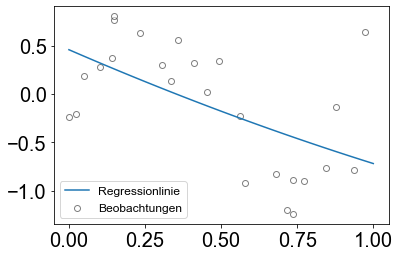

In [8]:
X = poly_data['x'].values.reshape(-1,1)
y = poly_data['y'].values.reshape(-1,1)

# Lineares Modell fitten
model = LinearRegression()
model.fit(X, y)

# Polynomial Fit
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_2, y)

X_predict_reg_line = poly.transform(np.linspace(0,1, 25).reshape(-1,1))
y_reg_line = model.predict(X_predict_reg_line)

fig, ax = plt.subplots()
ax.plot(np.linspace(0,1, 25), y_reg_line, label='Regressionlinie')
ax.scatter(x=X, y=y,
           alpha=0.5,  color="white", edgecolor = 'k', label='Beobachtungen')

ax.legend();

### Anpassen einer Kurve in Python (Fortsetzung)

Da wir nun die Notation in Python kennen, beginnen wir mit der Erstellung von $6$ verschiedenen Modellen, mit $k=1,2,3,5,9,14$. Für jedes Modell berechnen wir den $RMSE$. Schließlich stellen wir die Daten zusammen mit der Regressionslinie dar, die durch jedes einzelne Modell gegeben ist. Der Einfachheit halber konstruieren wir einen Loop, um den Kodierungsaufwand zu verringern.

RMSE (k=) : 1 0.5249892684216972
RMSE (k=) : 2 0.5247914320357341
RMSE (k=) : 3 0.2712244954374838
RMSE (k=) : 4 0.2660744861674046
RMSE (k=) : 5 0.26544030831480825
RMSE (k=) : 9 0.20168067039878035
RMSE (k=) : 14 0.15910424766847064


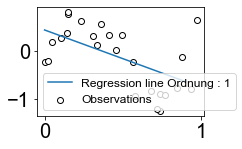

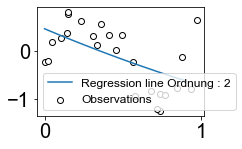

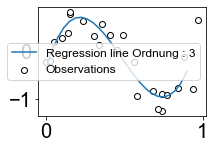

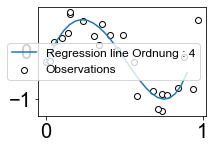

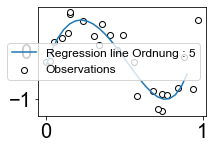

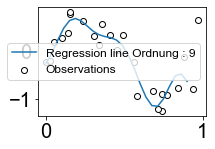

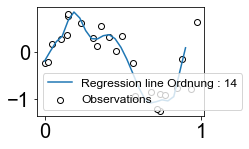

In [9]:
RMSE_list = []

X = poly_data['x'].values.reshape(-1,1)
y = poly_data['y'].values.reshape(-1,1)

# Lineares Modell fitten
model = LinearRegression()
model.fit(X, y)
Order = [1,2,3,4,5,9,14]
for i in Order:
    


    # Polynomial Fit
    poly = PolynomialFeatures(degree=i)
    X_2 = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_2, y)

    X_predict_reg_line = poly.transform(np.linspace(0,0.9, 25).reshape(-1,1))
    y_reg_line = model.predict(X_predict_reg_line)

    fig, ax = plt.subplots(figsize=(3, 2))
    ax.plot(np.linspace(0,0.9, 25), y_reg_line, label="Regression line Ordnung : %i" % i)
    ax.scatter(x=X, y=y,
             color="white", edgecolor = 'k', label="Observations")
    
    RMSE = mean_squared_error(y,model.predict(X_2), squared=False)
    print('RMSE (k=) :',i,RMSE)
    RMSE_list.append(RMSE)
    ax.legend();

Fantastische Diagramme! Die Abbildung zeigt, dass wenn wir $k$, die Ordnung des Polynoms, erhöht, wird die Kurve flexibler und passt immer besser zu den Daten. Je besser die Daten angepasst werden, desto geringer wird der Fehler, $RMSE$.

Der Einfachheit halber plotten wir den $RMSE$ gegen $k$.

Text(0.5, 0, 'k-te Ordnung')

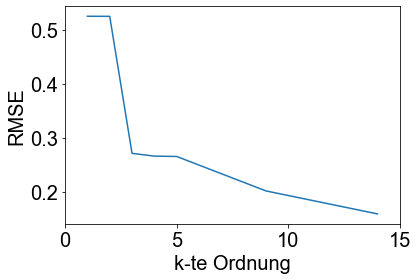

In [10]:
k = [1,2,3,4,5,9,14]
plt.plot(k,RMSE_list)
plt.xlim(0,15)
plt.ylabel('RMSE')
plt.xlabel('k-te Ordnung')

Daher stellt sich wieder einmal die Frage, welches Polynom am besten zu den Daten passt. Glauben wir, dass das Polynom der Ordnung $14$ am besten zu dem zugrunde liegenden Datenerzeugungsprozess passt? Obwohl wir eine hervorragende Anpassung an die Beobachtungsdaten erhalten, indem wir die Ordnung des Polynoms erhöhen, bleibt es fraglich, ob das Polynom hoher Ordnung gut verallgemeinert werden kann. Stellen Sie sich vor, wir führen eine neue Messreihe durch und erhalten neue Daten. Glauben Sie, dass die wild schwingende Kurve eines Polynoms hoher Ordnung immer noch gut zu den Daten passt? Nein, wahrscheinlich nicht!

Dieses Verhalten wird als <a href="https://en.wikipedia.org/wiki/Overfitting">Überanpassung</a> bezeichnet. Erinnern Sie sich daran, dass das Ziel darin besteht, die Parameter aus den Daten zu lernen. Wir sind also daran interessiert, eine gute Verallgemeinerung des Modells zu erreichen und nicht unbedingt perfekt angepasste Beobachtungsdaten.

### Aus den Daten lernen

Wie können wir das Problem lösen? Wie bestimmen wir das beste Polynom $n$-ter Ordnung für unseren Datensatz? Nun, es gibt viele Methoden und Strategien, um einer Überanpassung entgegenzuwirken. In diesem Abschnitt verfolgen wir einen einfachen Ansatz. Zunächst teilen wir den Datensatz in zwei Teile auf. Einen Teil nennen wir **Trainingsmenge**, den anderen Teil nennen wir **Validierungsmenge**. Dann verwenden wir alle Daten des Trainingssatzes, um die Modellparameter $\beta_i$ zu lernen, und zwar auf die gleiche Weise wie oben. Danach wenden wir das gelernte Modell an, um die Daten des Validierungssatzes vorherzusagen, und bewerten die Leistung des Modells, indem wir den $RMSE$ berechnen. Wir verwenden also die Validierungsmenge, um die, durch $k$ gegebene, Komplexität des Modells zu optimieren.

Leider brauchen wir, wenn wir aus Daten lernen wollen, letztendlich auch Daten, aus denen wir lernen können. Bislang haben wir mit $25$ Beobachtungen gearbeitet. Das ist nicht viel. In realen Anwendungen müssten wir wahrscheinlich neue Beobachtungen durch eine neue Messreihen gewinnen. In unserer Übung können wir jedoch relativ leicht mehr Daten erzeugen. Daher setzen wir dieses Beispiel mit einem neuen Datensatz von $60$ Beobachtungen fort.

Lassen Sie uns die Daten plotten!

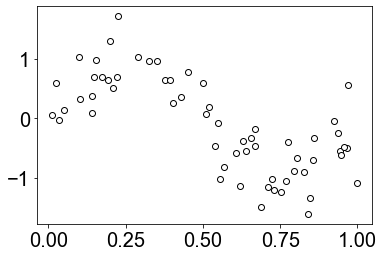

In [11]:
data = pd.read_csv('example_data.csv')
plt.scatter(data['x'],data['y'],color = 'white',edgecolor ='k')

### Trainings- und Validierungsmenge

Nun sind wir bereit, unsere Trainings- und Validierungsmenge zu erstellen. Dazu verwenden wir die Funktion `train_test_split()` aus dem `sklearn`-Paket. Wir teilen die Daten so auf, dass $65 \%$ der Daten dem Trainingsset und der Rest, $35 \%$ der Daten, dem Validationsset zugewiesen werden.

In [12]:
X = data.x.values.reshape(-1, 1)
y = data.y.values.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35,random_state=42)

In [13]:
# check dimensions of the training and validation set
print('Training Set :')
print('X_train :',np.shape(X_train))
print('y_train :',np.shape(y_train))

print('Validation Set :')
print('X_val :',np.shape(X_val))
print('y_val :',np.shape(y_val))

Training Set :
X_train : (39, 1)
y_train : (39, 1)
Validation Set :
X_val : (21, 1)
y_val : (21, 1)


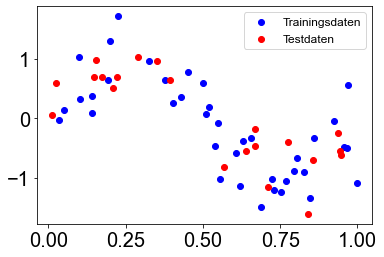

In [14]:
x_train = np.array(X_train)

y_train = np.array(y_train)

#Create single dimension
x_train= x_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)

inds = x_train.ravel().argsort()  # Sort x values and get index    
x_train = x_train.ravel()[inds].reshape(-1,1)
y_train = y_train[inds] #Sort y according to x sorted index


#Plot
plt.scatter(x_train,y_train, label = 'Trainingsdaten', color = 'blue')

x_test = X_val

y_test = y_val

#Create single dimension
x_test= x_test.reshape(-1,1)
y_test= y_test.reshape(-1,1)

inds2 = x_test.ravel().argsort()  # Sort x values and get index    
x_test = x_test.ravel()[inds2].reshape(-1,1)
y_test = y_test[inds2] #Sort y according to x sorted index


#Plot
plt.scatter(x_test,y_test, label = 'Testdaten', color = 'red')
plt.legend();


### Modellbildung und Modellbewertung

In dieser Übung werden wir $14$ Modelle mit $k=1,2,...,10$ erstellen. Wir bewerten jedes der $10$ polynomialen Regressionsmodelle, indem wir den $RMSE$ auf dem Trainingssatz berechnen. Nach der Erstellung des Modells und der Ermittlung der Modellparameter $\beta_i$ verwenden wir das Modell, um die Antwortvariable in der Validierungsmenge vorherzusagen. Auch hier stützen wir uns auf den $RMSE$, um die Vorhersagen für den Validierungssatz zu bewerten. Schließlich stellen wir den $RMSE$ jedes Modells sowohl für die Trainingsmenge als auch für die Validierungsmenge dar. Anhand des $RMSE$ bewerten wir die Generalisierung des Modells.

Als Übung und da `sklearn` keine Standardfehler ausgibt, bauen wir dazu das auf den selben Daten basierende Modell in `statsmodels.api` mit `OLS`.

Wir berechnen den $RMSE$ für jedes `OLS` Modell $k=1,2,...,10$ und plotten die Trainingsdaten gegen die Testdaten.

RMSE_formula (k=) : 1 [0.60315572]
RMSE_formula (k=) : 1 [0.47381135]
RMSE_formula (k=) : 2 [0.6004086]
RMSE_formula (k=) : 2 [0.48041784]
RMSE_formula (k=) : 3 [0.42619784]
RMSE_formula (k=) : 3 [0.37157397]
RMSE_formula (k=) : 4 [0.42060503]
RMSE_formula (k=) : 4 [0.42130317]
RMSE_formula (k=) : 5 [0.38556566]
RMSE_formula (k=) : 5 [0.39167928]
RMSE_formula (k=) : 6 [0.37731269]
RMSE_formula (k=) : 6 [0.43238473]
RMSE_formula (k=) : 7 [0.36685734]
RMSE_formula (k=) : 7 [0.42179427]
RMSE_formula (k=) : 8 [0.3648478]
RMSE_formula (k=) : 8 [0.41725233]
RMSE_formula (k=) : 9 [0.36406595]
RMSE_formula (k=) : 9 [0.44425622]
RMSE_formula (k=) : 10 [0.34605466]
RMSE_formula (k=) : 10 [0.8547434]


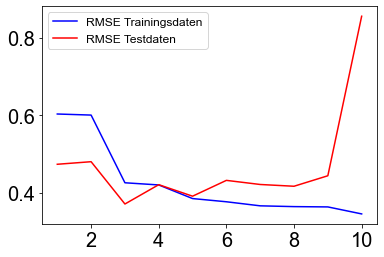

In [35]:
trmse2_eval_list = []
rmse2_eval_list = []
trmse_formula_eval_list = []
rmse_formula_eval_list = []
for i in range(1,11):
    polynomial_features= PolynomialFeatures(degree=i)
    # Definiere x-Achse
    x_n = np.linspace(0,1, 500).reshape(-1,1)
    x_n_2= np.linspace(0,1, 500).reshape(-1,1)
    # Berechne Features für x_n und x_n_2
    x_p_axis = polynomial_features.fit_transform(x_n)
    x_p_axis2 = polynomial_features.fit_transform(x_n_2)
    # Berechne Features für x und x2
    xp = polynomial_features.fit_transform(x_train)
    xp2 = polynomial_features.fit_transform(x_test)
    
    # Fitte Modell für Trainingsdaten
    model_stats = sm.OLS(y_train, xp).fit()
    ypred_axis = model_stats.predict(x_p_axis) 
    # Fitte Modell für Testdaten
    model_stats2 = sm.OLS(y_test, xp2).fit()
    ypred_axis2 = model_stats2.predict(x_p_axis2)
    
    ypred = model_stats.predict(xp) 
    ypred2 = model_stats.predict(xp2) 
    
    # Berechne RMSE - Trainingsdaten
    trmse_formula_eval = np.sqrt((sum((ypred.reshape(-1,1)-y_train)**2))/(len(y_train)))
    print('RMSE_formula (k=) :',i,trmse_formula_eval)
    trmse_formula_eval_list.append(trmse_formula_eval)
    # Berechne RMSE - Testdaten
    rmse_formula_eval = np.sqrt((sum((ypred2.reshape(-1,1)-y_test)**2))/(len(y_test)))
    print('RMSE_formula (k=) :',i,rmse_formula_eval)
    rmse_formula_eval_list.append(rmse_formula_eval)
    
k =[1,2,3,4,5,6,7,8,9,10]
plt.plot(k, trmse_formula_eval_list,color = 'blue', label = 'RMSE Trainingsdaten')

plt.plot(k, rmse_formula_eval_list,color = 'red', label = 'RMSE Testdaten')
plt.legend();

Die Abbildung zeigt, dass der Fehler bei den Trainingsdaten (blaue Linie) stetig abnimmt. Das macht durchaus Sinn, denn je komplexer das Modell wird, indem $k$ erhöht wird, desto besser passt das Modell zu den Trainingsdaten. Das gleiche Verhalten haben wir im obigen Abschnitt beobachtet, als wir unser Modell mit nur $25$ Beobachtungen gelernt haben. Wenn wir uns den $RMSE$ für den Validierungssatz (rote Linie) ansehen, sehen wir, dass mit zunehmendem $k$ und damit zunehmender Modellkomplexität der Fehler abnimmt. Es gibt jedoch einen "Sweet Spot", der durch den niedrigsten $RMSE$ angezeigt wird, an dem das Modell gerade komplex genug ist, um auf den bisher ungesehenen Validierungsdaten gut zu generalisieren. Wenn die Modellkomplexität weiter zunimmt, beginnt auch der $RMSE$ zu steigen. Dies deutet auf eine Überanpassung des Modells hin. Das Modell merkt sich also die Daten in der Trainingsmenge gut, aber die Vorhersagekraft des Modells für bisher ungesehene Daten, wie die Daten der Validierungsmenge, wird schlechter. Ein Blick auf die obige Abbildung zeigt, dass der niedrigste Fehler im Validierungssatz, der so genannte Sweet Spot, für ein Regressionsmodell $5$-ter Ordnung erreicht wird.

### Vorstellung des Modells

Im vorangegangenen Abschnitt haben wir festgestellt, dass ein polynomiales Regressionsmodell der Ordnung $5$ in der Validierungsgruppe am besten funktioniert. Nun stellen wir dieses Modell einschließlich der $95 \%$-Konfidenzintervalle auf dem Datensatz dar, um seine Qualität visuell zu bewerten. Außerdem stellen wir die Funktion dar, die dem Prozess der Datengenerierung zugrunde liegt.

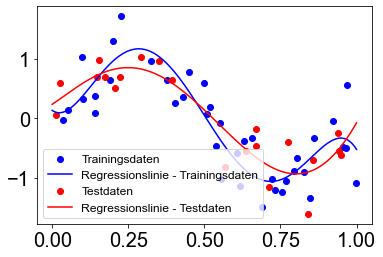

In [37]:
polynomial_features= PolynomialFeatures(degree=5)
# Definiere x-Achse
x_n = np.linspace(0,1, 500).reshape(-1,1)
x_n_2= np.linspace(0,1, 500).reshape(-1,1)
# Berechne Features für x_n und x_n_2
x_p_axis = polynomial_features.fit_transform(x_n)
x_p_axis2 = polynomial_features.fit_transform(x_n_2)
# Berechne Features für x und x2
xp = polynomial_features.fit_transform(x_train)
xp2 = polynomial_features.fit_transform(x_test)
    
# Fitte Modell für Trainingsdaten
model_stats = sm.OLS(y_train, xp).fit()
ypred_axis = model_stats.predict(x_p_axis) 
# Fitte Modell für Testdaten
model_stats2 = sm.OLS(y_test, xp2).fit()
ypred_axis2 = model_stats2.predict(x_p_axis2)
    
ypred = model_stats.predict(xp) 
ypred2 = model_stats.predict(xp2) 

# Plotte Daten
plt.scatter(x_train,y_train, label = 'Trainingsdaten', color = 'blue')
plt.plot(x_n,ypred_axis, color = 'blue', label = 'Regressionslinie - Trainingsdaten')

plt.scatter(x_test,y_test, label = 'Testdaten', color = 'red')
plt.plot(x_n,ypred_axis2, color = 'red', label = 'Regressionslinie - Testdaten')
#k =[1,2,3,4,5,6,7,8,9,10]
#plt.plot(k, trmse_formula_eval_list,color = 'blue', label = 'RMSE Trainingsdaten')

#plt.plot(k, rmse_formula_eval_list,color = 'red', label = 'RMSE Testdaten')
plt.legend();

In [38]:
model_stats2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     14.14
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           3.19e-05
Time:                        19:30:57   Log-Likelihood:                -5.5808
No. Observations:                  21   AIC:                             23.16
Df Residuals:                      15   BIC:                             29.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2352      0.354      0.664      0.517      -0.520       0.990
x1             3.4530      8.722      0.396      0.698     -15.138      22.045
x2             5.4113     62.157      0.087      0.932    -127.073     137.896
x3           -51.7700    169.141     -0.306      0.764    -412.285     308.745
x4            62.8932    195.408      0.322      0.752    -353.609     479.395
x5           -20.2985     80.732     -0.251      0.805    -192.374     151.777
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.935
Skew:                          -0.497   Prob(JB):                        0.627
Kurtosis:                       2.716   Cond. No.                     4.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

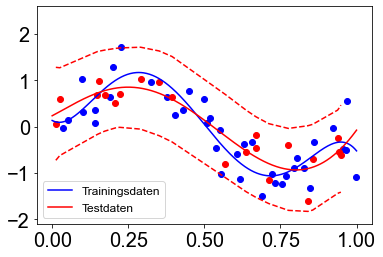

In [42]:

_, upper,lower = wls_prediction_std(model_stats2)
plt.ylim(-2.1,2.6)
plt.scatter(x_train,y_train, color = 'blue')
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_n,ypred_axis, label='Trainingsdaten', color = 'blue')
plt.plot(x_n_2,ypred_axis2, label='Testdaten', color = 'red')
plt.plot(x_test,upper,'--', color = 'red') # Konfidenz Intervall
plt.plot(x_test,lower,'--', color = 'red')
plt.legend(loc='lower left')



Die Abbildung zeigt, dass unser Modell die Daten gut abbildet und wir daher recht zufrieden damit sein können.

### Datenerzeugungsfunktion

Die Eingabewerte $x_n$ für die zugrundeliegende Funktion werden gleichmäßig im Bereich $U(0,1)$ erzeugt, und die entsprechenden Zielwerte $y$ erhält man, indem man zunächst die entsprechenden Werte der Funktion $\sin( \pi x )$ berechnet und dann zufälliges Rauschen mit einer Gaußschen Verteilung mit einer Standardabweichung von $0,35$ hinzufügt.

------------------------------------------------------------------------------------------------------------------------

### RMSE PROBLEM

tMAE (k=) : 1 0.7074732967693652
tRMSE (k=) : 1 0.6031557239743102
trmse2 (k=) : 1 0.6031557239743102
tRMSE_formula (k=) : 1 0.6031557239743102
MAE (k=) : 1 0.6232178787833408
RMSE (k=) : 1 0.47381134570088695
rmse2 (k=) : 1 0.47381134570088695
RMSE_formula (k=) : 1 0.473811345700887
tMAE (k=) : 2 0.7107641022765366
tRMSE (k=) : 2 0.6004085974052585
trmse2 (k=) : 2 0.6004085974052585
tRMSE_formula (k=) : 2 0.6004085974052585
MAE (k=) : 2 0.6196265453469135
RMSE (k=) : 2 0.4804178397400819
rmse2 (k=) : 2 0.4804178397400819
RMSE_formula (k=) : 2 0.48041783974008184
tMAE (k=) : 3 0.5804381539964887
tRMSE (k=) : 3 0.4261978382454827
trmse2 (k=) : 3 0.4261978382454827
tRMSE_formula (k=) : 3 0.42619783824548274
MAE (k=) : 3 0.55527919665625
RMSE (k=) : 3 0.3715739708528932
rmse2 (k=) : 3 0.3715739708528932
RMSE_formula (k=) : 3 0.3715739708528932
tMAE (k=) : 5 0.5641059025782519
tRMSE (k=) : 5 0.3855656608713295
trmse2 (k=) : 5 0.3855656608713295
tRMSE_formula (k=) : 5 0.3855656608713295
MAE

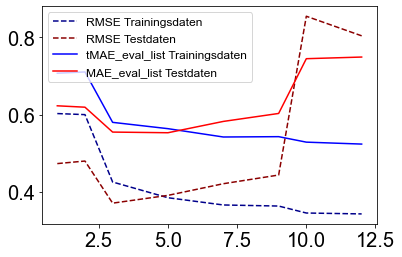

In [43]:
# Definiere Funktion MAE
def MAE(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error
    MAE = np.sqrt(mean_absolute_error(y_true, y_pred))
    return MAE

def rmse2(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

RMSE_list = []
RMSE_list2 = []
rmse2_eval_list = []
rzwei_list = []
MAE_eval_list = []
rmse_formula_eval_list = []

tRMSE_list = []
tRMSE_list2 = []
trmse2_eval_list = []
trzwei_list = []
tMAE_eval_list = []
trmse_formula_eval_list = []

data = pd.read_csv('example_data.csv')



# Teile Daten in X_train y_train , X_test,y_test
X_train, X_test, y_train,y_test = train_test_split(data['x'],data['y'],test_size=0.35,random_state=42)
X_train_df, X_test_df = pd.DataFrame(X_train),pd.DataFrame(X_test)

x_axis = pd.DataFrame(np.linspace(0,1,500))

Order = [1,2,3,5,7,9,10,12]
for i in Order:
    
    
    # Polynomialfeatures berechnen, Variablen Polynomemerkmale hinzufügen
    poly = PolynomialFeatures(degree = i)
    x_axis_poly = poly.fit_transform(x_axis)
    X_train_poly , X_test_poly = poly.fit_transform(X_train_df) , poly.fit_transform(X_test_df)
    
    # lineares Model fitten
    model = linear_model.LinearRegression()
    model = model.fit(X_train_poly, y_train)
    
    # Regressionlinie berechnen
    y_train_predict = model.predict(x_axis_poly)
    #Vorhersage Testset
    prediction = model.predict(X_train_poly)
    # Vorhersage Validationset
    prediction2 = model.predict(X_test_poly)
    
    # Berechne RMSE,r^2, und meanabsoluteError für Trainings und Validationsdatensatz
    
    MAE_eval = MAE(y_train, prediction)
    print('tMAE (k=) :',i,MAE_eval)
    tMAE_eval_list.append(MAE_eval)
    
    RMSE = mean_squared_error(prediction,y_train, squared=False)
    print('tRMSE (k=) :',i,RMSE)
    tRMSE_list.append(RMSE)
          
    rmse2_eval = rmse2(prediction,y_train)
    print('trmse2 (k=) :',i,rmse2_eval)
    trmse2_eval_list.append(rmse2_eval)
    
    rmse_formula_eval = np.sqrt((sum((prediction-y_train)**2))/(len(y_train)))
    print('tRMSE_formula (k=) :',i,rmse_formula_eval)
    trmse_formula_eval_list.append(rmse_formula_eval)

    MAE_eval = MAE(y_test, prediction2)
    print('MAE (k=) :',i,MAE_eval)
    MAE_eval_list.append(MAE_eval)
    
    RMSE = mean_squared_error(prediction2,y_test, squared=False)
    print('RMSE (k=) :',i,RMSE)
    RMSE_list.append(RMSE)
          
    rmse2_eval = rmse2(prediction2,y_test)
    print('rmse2 (k=) :',i,rmse2_eval)
    rmse2_eval_list.append(rmse2_eval)
    
    rmse_formula_eval = np.sqrt((sum((prediction2-y_test)**2))/(len(y_test)))
    print('RMSE_formula (k=) :',i,rmse_formula_eval)
    rmse_formula_eval_list.append(rmse_formula_eval)

k =[1,2,3,4,5,6,7,8,9,10]

#plt.plot(k, trzwei_list,color = 'blue')

#plt.plot(k, rzwei_list,color = 'red')

#plt.plot(k, trmse2_eval_list,color = 'blue')

#plt.plot(k, rmse2_eval_list,color = 'red')

#plt.plot(k, tMAE_eval_list,color = 'blue')

#plt.plot(k, MAE_eval_list,color = 'red')

plt.plot(Order, trmse_formula_eval_list,color = 'darkblue', label = 'RMSE Trainingsdaten', linestyle = '--')

plt.plot(Order, rmse_formula_eval_list,color = 'darkred', label = 'RMSE Testdaten', linestyle = '--')

plt.plot(Order, tMAE_eval_list,color = 'blue', label = 'tMAE_eval_list Trainingsdaten')

plt.plot(Order, MAE_eval_list,color = 'red', label = 'MAE_eval_list Testdaten')

plt.legend();


tMAE (k=) : 1 0.7074732967693652
tRMSE (k=) : 1 0.6031557239743102
trmse2 (k=) : 1 0.6031557239743102
tRMSE_formula (k=) : 1 0.6031557239743102
MAE (k=) : 1 0.6232178787833408
RMSE (k=) : 1 0.47381134570088695
rmse2 (k=) : 1 0.47381134570088695
RMSE_formula (k=) : 1 0.473811345700887
tMAE (k=) : 2 0.7107641022765366
tRMSE (k=) : 2 0.6004085974052585
trmse2 (k=) : 2 0.6004085974052585
tRMSE_formula (k=) : 2 0.6004085974052585
MAE (k=) : 2 0.6196265453469135
RMSE (k=) : 2 0.4804178397400819
rmse2 (k=) : 2 0.4804178397400819
RMSE_formula (k=) : 2 0.48041783974008184
tMAE (k=) : 3 0.5804381539964887
tRMSE (k=) : 3 0.4261978382454827
trmse2 (k=) : 3 0.4261978382454827
tRMSE_formula (k=) : 3 0.42619783824548274
MAE (k=) : 3 0.55527919665625
RMSE (k=) : 3 0.3715739708528932
rmse2 (k=) : 3 0.3715739708528932
RMSE_formula (k=) : 3 0.3715739708528932
tMAE (k=) : 4 0.5834162572195413
tRMSE (k=) : 4 0.42060503013326916
trmse2 (k=) : 4 0.42060503013326916
tRMSE_formula (k=) : 4 0.4206050301332691
M

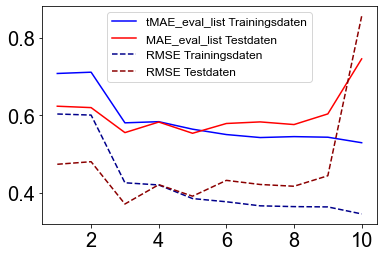

In [44]:
# Definiere Funktion MAE
def MAE(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error
    MAE = np.sqrt(mean_absolute_error(y_true, y_pred))
    return MAE

def rmse2(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

RMSE_list = []
RMSE_list2 = []
rmse2_eval_list = []
rzwei_list = []
MAE_eval_list = []
rmse_formula_eval_list = []

tRMSE_list = []
tRMSE_list2 = []
trmse2_eval_list = []
trzwei_list = []
tMAE_eval_list = []
trmse_formula_eval_list = []

data = pd.read_csv('example_data.csv')



# Teile Daten in X_train y_train , X_test,y_test
X_train, X_test, y_train,y_test = train_test_split(data['x'],data['y'],test_size=0.35,random_state=42)
X_train_df, X_test_df = pd.DataFrame(X_train),pd.DataFrame(X_test)

x_axis = pd.DataFrame(np.linspace(0,1,500))


for i in range(1,11):
    
    
    # Polynomialfeatures berechnen, Variablen Polynomemerkmale hinzufügen
    poly = PolynomialFeatures(degree = i)
    x_axis_poly = poly.fit_transform(x_axis)
    X_train_poly , X_test_poly = poly.fit_transform(X_train_df) , poly.fit_transform(X_test_df)
    
    # lineares Model fitten
    model = linear_model.LinearRegression()
    model = model.fit(X_train_poly, y_train)
    
    # Regressionlinie berechnen
    y_train_predict = model.predict(x_axis_poly)
    #Vorhersage Testset
    prediction = model.predict(X_train_poly)
    # Vorhersage Validationset
    prediction2 = model.predict(X_test_poly)
    
    # Berechne RMSE,r^2, und meanabsoluteError für Trainings und Validationsdatensatz
    
    MAE_eval = MAE(y_train, prediction)
    print('tMAE (k=) :',i,MAE_eval)
    tMAE_eval_list.append(MAE_eval)
    
    RMSE = mean_squared_error(prediction,y_train, squared=False)
    print('tRMSE (k=) :',i,RMSE)
    tRMSE_list.append(RMSE)
          
    rmse2_eval = rmse2(prediction,y_train)
    print('trmse2 (k=) :',i,rmse2_eval)
    trmse2_eval_list.append(rmse2_eval)
    
    rmse_formula_eval = np.sqrt((sum((prediction-y_train)**2))/(len(y_train)))
    print('tRMSE_formula (k=) :',i,rmse_formula_eval)
    trmse_formula_eval_list.append(rmse_formula_eval)

    MAE_eval = MAE(y_test, prediction2)
    print('MAE (k=) :',i,MAE_eval)
    MAE_eval_list.append(MAE_eval)
    
    RMSE = mean_squared_error(prediction2,y_test, squared=False)
    print('RMSE (k=) :',i,RMSE)
    RMSE_list.append(RMSE)
          
    rmse2_eval = rmse2(prediction2,y_test)
    print('rmse2 (k=) :',i,rmse2_eval)
    rmse2_eval_list.append(rmse2_eval)
    
    rmse_formula_eval = np.sqrt((sum((prediction2-y_test)**2))/(len(y_test)))
    print('RMSE_formula (k=) :',i,rmse_formula_eval)
    rmse_formula_eval_list.append(rmse_formula_eval)

k =[1,2,3,4,5,6,7,8,9,10]

#plt.plot(k, trzwei_list,color = 'blue')

#plt.plot(k, rzwei_list,color = 'red')

#plt.plot(k, trmse2_eval_list,color = 'blue')

#plt.plot(k, rmse2_eval_list,color = 'red')

plt.plot(k, tMAE_eval_list,color = 'blue', label = 'tMAE_eval_list Trainingsdaten')

plt.plot(k, MAE_eval_list,color = 'red', label = 'MAE_eval_list Testdaten')

plt.plot(k, trmse_formula_eval_list,color = 'darkblue', label = 'RMSE Trainingsdaten',linestyle ='--')

plt.plot(k, rmse_formula_eval_list,color = 'darkred', label = 'RMSE Testdaten',linestyle ='--')

plt.legend();